# PyTorch Hub 로부터 pretrained model을 가져와서 활용해보기
- 이번 실습 과제는 유명한 CNN들의 성능을 내가 가지고 있는 사진을 이용하여 직접 체험해 보는 것입니다. 
- pretrained model이 구분하는 class들은 아래의 csv파일을 통해 확인할 수 있습니다. 어떠한 class들을 구분하도록 학습되었는지 확인하여 봅시다.
- https://raw.githubusercontent.com/hufsbme/T10402101/master/ch7_modern_ConvNets/imagenet_class_index.csv
- 나의 주변에서 1000가지 class에 포함되어 있으나, 사람이 보기에는 구분이 쉬우나 기계는 구분이 어려울 것 같다고 생각되는 장면을 직접 본인의 핸드폰으로 촬영하여 사진을 업로드 하고 여러가지 CNN들로 예측하여 결과를 비교해 보겠습니다.

In [0]:
import torch
import pandas as pd
from PIL import Image
import requests
from torchvision import transforms

imagenet_class_index.json에는 imagenet 1000개 class에 대한 정보를 담고 있습니다. pretrained model이 예측한 category가 무엇인지 확인해보기 위해 label정보가 담겨 있는 파일을 미리 읽습니다.

In [0]:
idx2label = pd.read_csv('https://raw.githubusercontent.com/hufsbme/T10402101/master/ch7_modern_ConvNets/imagenet_class_index.csv')
idx2label = idx2label.to_numpy()
idx2label = idx2label[:,1]

내 사진을 불러오기 위해서 내 사진들을 저장하고 있는 구글 드라이브를 마운트 합니다.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


과제에서 제시된 pretrained model을 찾아서 불러오고, preprocess를 정의합니다. 아래의 링크에서 조사를 하여 적절한 모델을 쉽게 불러올 수 있을 것입니다.
- https://pytorch.org/hub/

In [4]:
net = torch.hub.load('pytorch/vision:v0.6.0', 'resnet18', pretrained=True)
net.eval()
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.6.0


나의 사진을 불러옵니다. 사진이 rgb가 아닌 cmyk 등 다른 형식으로 저장되어 있는 경우도 있으므로, RGB로 convert하여 불러옵니다. web주소를 불러오는 경우와 내 드라이브에서 가져오는 경우 불러오는 코드가 다름에 주의합니다.

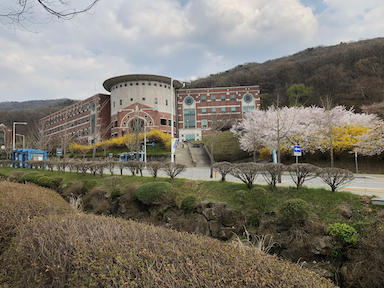

In [5]:
# sample execution (requires torchvision)

# web image
url  = 'https://raw.githubusercontent.com/hufsbme/T10402101/master/ch7_modern_ConvNets/hufs_campus.png'
input_image = Image.open(requests.get(url, stream=True).raw).convert("RGB")

# google drive image
#url  = '/content/drive/My Drive/hufs/image/hufs_campus.png'
#input_image = Image.open(url).convert("RGB")

input_image

pretrained network에 나의 사진을 넣고, output을 큰 순서대로 정렬하여 index와 value를 저장합니다.

In [0]:
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model
output = net(input_batch)
output = torch.nn.functional.softmax(output[0], dim=0)
out_sort_val, out_sort_ind = output.sort()

1000개의 class 중에 내 사진에 대해 가장 높은 예측확률을 보여준 5개의 class를 확률과 함께 출력합니다.

1st prediction:  castle 	 with probability:  0.7051336 

2nd prediction:  palace 	 with probability:  0.09817508 

3rd prediction:  viaduct 	 with probability:  0.049880985 

4th prediction:  dam 	 with probability:  0.016732706 

5th prediction:  mosque 	 with probability:  0.0143027995 



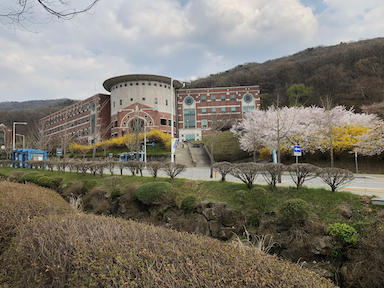

In [7]:
# top-5 predictions
print('1st prediction: ',idx2label[out_sort_ind[-1]],'\t with probability: ', out_sort_val[-1].detach().numpy(),'\n')
print('2nd prediction: ',idx2label[out_sort_ind[-2]],'\t with probability: ', out_sort_val[-2].detach().numpy(),'\n')
print('3rd prediction: ',idx2label[out_sort_ind[-3]],'\t with probability: ', out_sort_val[-3].detach().numpy(),'\n')
print('4th prediction: ',idx2label[out_sort_ind[-4]],'\t with probability: ', out_sort_val[-4].detach().numpy(),'\n')
print('5th prediction: ',idx2label[out_sort_ind[-5]],'\t with probability: ', out_sort_val[-5].detach().numpy(),'\n')

input_image

